### Support vector for regression - SVR

##### <b style="color: red">WARNINIG: </b>Features for this model must be standarded by using preprocessing/ standard scaler!

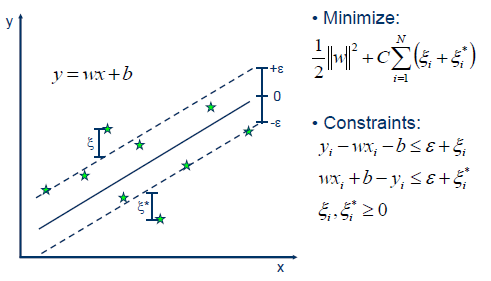
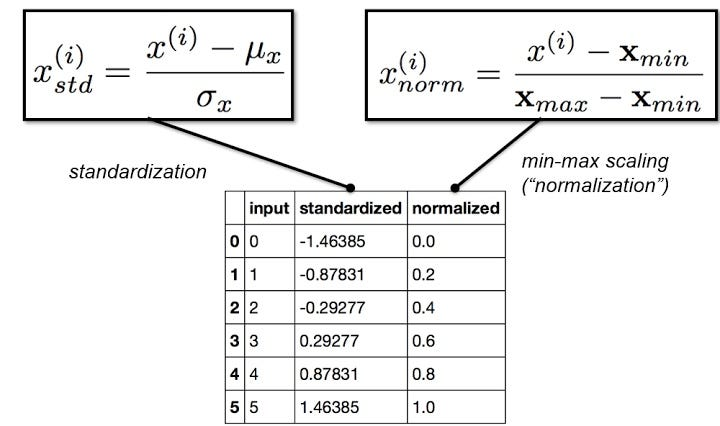
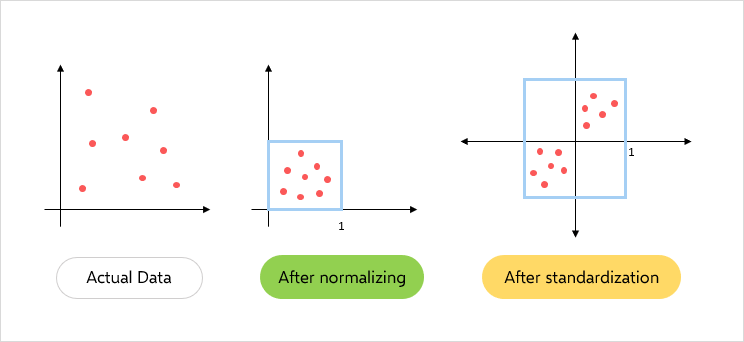

### 1. Loading data and preprocessing.

In [60]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [43]:
data_frame = pd.read_csv("./Position_Salaries.csv")

X = data_frame.iloc[:, 1:-1].values
y = data_frame.iloc[:, -1].values

print(f"Loaded data frame: \n{data_frame}")

print(f"X: \n{X}")
print(f"y: \n{y}")

Loaded data frame: 
            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
X: 
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
y: 
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [44]:
y = y.reshape((len(y), 1))
print(f"y reshaped (matrix form): \n{y}")

y reshaped (matrix form): 
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [45]:
# Features of Suppor Vector for Regression model must be in standarded ;)
standard_scaler_x = StandardScaler()
X = standard_scaler_x.fit_transform(X)

standard_scaler_y = StandardScaler()
y = standard_scaler_y.fit_transform(y)

print(f"X standarded: \n{X}")
print(f"y standarded: \n{y}")

X standarded: 
[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
y standarded: 
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


### 2. Fitting and testing Suppor Vector for Regression model.

There is linear and non-linear kernels for SVR (SVM for regression):
- linear kernels fitting for linear behaviour of data,
- non-linear for curving/ non-linear data.

Kernels for SVR:
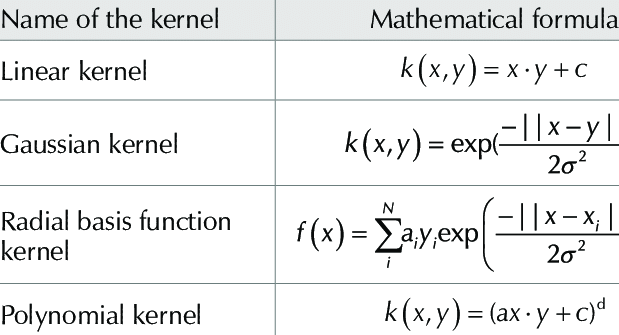
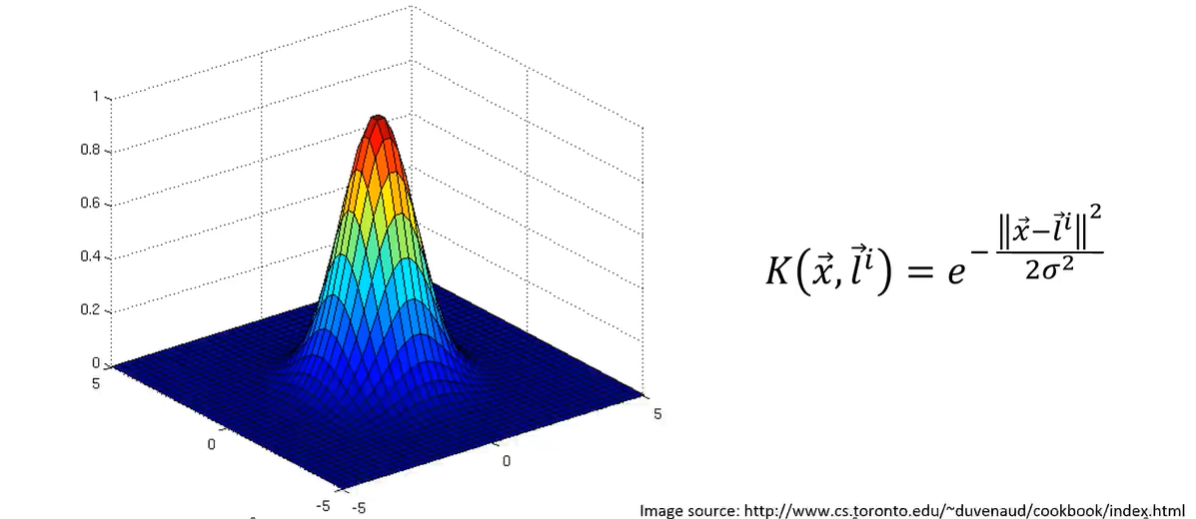

#### 2.1 Fitting model.

In [46]:
support_vector_regression_model = SVR(kernel="rbf")
support_vector_regression_model.fit(X, y)

c:\Users\PanCh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

#### 2.2 Predicting new results.

In [49]:
y_predicted = support_vector_regression_model.predict(
    standard_scaler_x.transform(
        [
            [6.5]
        ]
    )
)

print(f"Basic version (not invert_transformed): {y_predicted}")

y_predicted = standard_scaler_y.inverse_transform([y_predicted]).reshape((-1, 1))

print(f"Inverted transform prediction/ final: {y_predicted}")

Basic version (not invert_transformed): [-0.27861589]
Inverted transform prediction/ final: [[170370.0204065]]


In [54]:
y_predicted = support_vector_regression_model.predict(X)

print(y_predicted)

y_predicted = standard_scaler_y.inverse_transform(y_predicted.reshape((-1, 1)))

print(y_predicted)

[-0.6197853  -0.62924694 -0.56788994 -0.49732233 -0.44690338 -0.36617206
 -0.14115569  0.28557658  0.78226531  1.08559794]
[[ 73474.15615697]
 [ 70786.94584626]
 [ 88213.00902103]
 [108254.98574956]
 [122574.52250599]
 [145503.10688572]
 [209410.23132923]
 [330606.89204569]
 [471671.95587315]
 [557821.75899897]]


In [59]:
y_predicted = support_vector_regression_model.predict(
    standard_scaler_x.transform(
        [
            [6.5]
        ]
    )
)
print(y_predicted)
y_predicted = standard_scaler_y.inverse_transform(y_predicted.reshape(-1, 1))
print(y_predicted)

[-0.27861589]
[[170370.0204065]]


### 3. Visualising the support vector for regression model results.

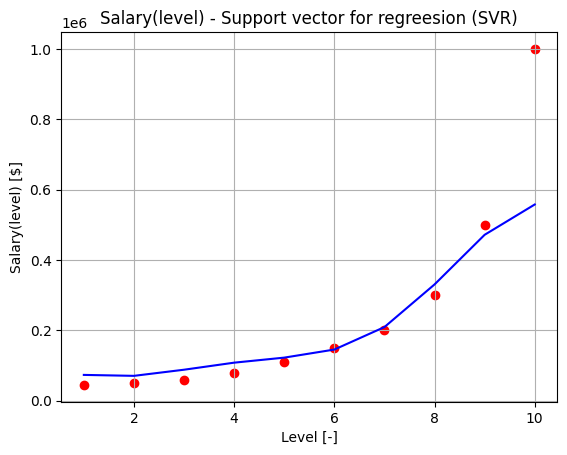

In [73]:
plt.scatter(
    standard_scaler_x.inverse_transform(X),
    standard_scaler_y.inverse_transform(y),
    color="red"
)
plt.plot(
    standard_scaler_x.inverse_transform(X),
    standard_scaler_y.inverse_transform(
        support_vector_regression_model.predict(X).reshape((-1, 1))
    ),
    color="blue"
)
plt.xlabel("Level [-]")
plt.ylabel("Salary(level) [$]")
plt.title("Salary(level) - Support vector for regreesion (SVR)")
plt.grid(True)
plt.savefig("Salary(Level) - SVR.jpg")